# Heatmap

When I first saw this challenge, I thought it would be interesting to plot all the service requests on a map and see a heatmap of the requests. I don't think this will tell me anything important, but it's always good to play around with your data to understand how it can be used.

In [1]:
import os
import gmaps
import data_jam.models as m

# Best City In The World
NYC = (40.7128, -74.0059)

# If only Google Maps didn't requrie a key...
gmaps.configure(api_key=os.environ['GOOGLE_MAPS_API_KEY'])

# Grab all the requests coordinates from the DB
query = m.ServiceRequest.select().limit(1000000).order_by(m.ServiceRequest.id.desc())
all_requests = m.ServiceRequest.lat_lngs(query)

# Create a map of NYC
map_fig = gmaps.figure(center=NYC, zoom_level=11)

# Generate a heatmap
heatmap = gmaps.heatmap_layer(all_requests)
heatmap.max_intensity = 1000
map_fig.add_layer(heatmap)

map_fig

A Jupyter Widget

Okay, so this looks pretty, but without some constraints, there is just too much noise. Luckily, we have a database of Storms from NOAA ([source](https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=ALL&beginDate_mm=01&beginDate_dd=01&beginDate_yyyy=2010&endDate_mm=05&endDate_dd=31&endDate_yyyy=2017&county=BRONX%3A5&county=KINGS%3A47&county=NEW%2BYORK%3A61&county=QUEENS%3A81&county=RICHMOND%3A85&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=36%2CNEW+YORK)), so let's play around with that.

\*I am not a data scientist so I'm just making up terms.

# Hurricane Sandy

According to Wikipedia, Hurricane Sandy hit NYC from October 29th 2012 to November 1st 2012. Since the focus of this hackathon is to observe how the 311 system responds during and in the aftermath of these events, I am going to open up the query a bit to include the month after the storm.

First let's query our storm table and see what's up.

In [1]:
from datetime import date
import tabulate
from IPython.display import HTML, display
import data_jam.models as m

start = date(2012, 10, 29)
end = date(2012, 11, 30)
storms = m.Storm.select().where(m.Storm.date >= start, m.Storm.date <= end)
headers = ('Date', 'Type', 'Borough', 'Deaths', 'Injured')
table = []

for storm in storms.iterator():
    table.append((storm.date, storm.type, storm.borough, storm.deaths, storm.injured))
    
display(HTML(tabulate.tabulate(table, headers=headers, tablefmt='html')))

Date,Type,Borough,Deaths,Injured
2012-10-29,Coastal Flood,QUEENS,7,0
2012-10-29,Coastal Flood,BROOKLYN,5,0
2012-10-29,Coastal Flood,MANHATTAN,2,0
2012-10-29,Coastal Flood,STATEN ISLAND,23,0
2012-10-29,Coastal Flood,QUEENS,0,0
2012-10-29,Coastal Flood,BRONX,0,0
2012-10-29,High Wind,STATEN ISLAND,1,0
2012-10-29,High Wind,MANHATTAN,1,0
2012-10-29,High Wind,BROOKLYN,2,0
2012-10-29,High Wind,QUEENS,1,0


Talk about getting hit hard by a storm. Every borough got flodding from this storm. Knowing how rough this storm is, let's take a look at the frequency of 311 calls around the end of October 2012.

In [4]:
import pendulum
import data_jam.models as m

start = pendulum.create(2012, 10, 22, 0, 0, 0, 0, 'America/New_York')
end = pendulum.create(2012, 11, 8, 23, 59, 59, 0, 'America/New_York')

query = m.ServiceRequest.select().where(
    m.ServiceRequest.happened_between(start, end)
)
calls = query.count()
print(f"{calls} calls were made.")

106506 calls were made.


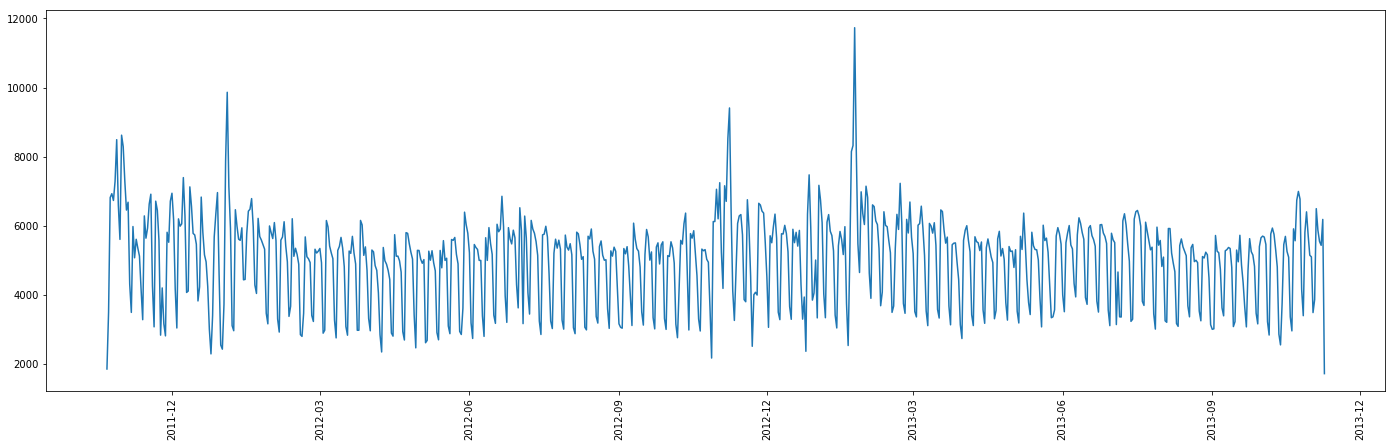

In [14]:
import pendulum
import matplotlib.pyplot as plt
import data_jam.models as m

from IPython.core.pylabtools import figsize
figsize(24, 7)

start = pendulum.create(2011, 10, 22, 0, 0, 0, 0, 'America/New_York')
end = pendulum.create(2013, 11, 8, 23, 59, 59, 0, 'America/New_York')
calls = list(m.ServiceRequest.count_by_day(start, end))

plt.plot(
    [call[0] for call in calls], 
    [call[1] for call in calls],
)
plt.xticks(rotation=90)
plt.show()